## Librerias

In [2]:
import opendatasets as od

import os, glob
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor

c:\Anaconda\envs\envTensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [2]:
od.download("https://www.kaggle.com/competitions/datathon-entel-2022-reto2/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  richardramosflores


Your Kaggle Key:

  ································


100%|██████████| 18.6M/18.6M [00:00<00:00, 21.1MB/s]



Extracting archive .\datathon-entel-2022-reto2/datathon-entel-2022-reto2.zip to .\datathon-entel-2022-reto2


## Data

In [4]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')
df_test_sample = pd.read_csv('test_sample.csv', sep=',')

In [12]:
print(df_train.shape)
df_train.head()

(47173, 55)


,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train['Z_MARCA'].value_counts()

285075a02b2679248a6b4636c3328bd3097626607c3e43c0c5498258fbfa9f29    11888
9fc7c2306f5afb4bfe47feefbd193f245633febbb1817113fdf0a768172285b5    10631
5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2cd09be494f221367bb5     5951
09c32757a9ca408c829114503523a5e6762dd1ba2b81067ad113837c1b30188b     5005
f223faa96f22916294922b171a2696d868fd1f9129302eb41a45b2a2ea2ebbfd     2844
df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17cdb25e77569ac595a2     2364
4b1acc0002585cda1245f0e07c6f58ff0e3b5a0e8d3187fa55d6e0ed43836c1d     1317
0855cd73c3a9dc2c31a7c4dcaecfd53282238c6a457a5c771cbee045c0d9a521     1225
53c759c773f2b832ddcc61534bdb919d44e03be212241e7dad49b286afa95340     1211
f41bcffa7463b16f9fea3293a550589718777902b4406c44e3150dad7c47bc3c      936
22ea092e7643557ea91b74dea27589acac28a04fce976c577c422cd3ee1c9dc2      864
c0dd56d5b73d72cbd9a3df3f70e0df98ce15417d0f8c3a678280beb763388a4f      724
1d45ae99abcc02002be90eabecf61d0ce0613d1de5f0c37ddd7bbbd7e8198cf5      637
c25b14ec280222786bd605c2e1d072a98fc186

In [14]:
df_train['Z_GAMA'].value_counts()

76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435892b1ab5713e57d470    20785
c4ebc6d4a5832cd9415f906ad03661110c705a72381c8b8b145761d02e2dd23a    12249
de88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e     5576
8563abec343968034b0624650aed7254081e9e39e6b32ed45171fe31f6b7ee59     4453
f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b     3719
392323a5d3dcd1a8e9076af54e17b493ec11dceab6311d4bbab6044846cbbc3f      390
14a2db592fdae9640e32d665e0b0007aecdf0dcad631fed35a1e60a23bef683a        1
Name: Z_GAMA, dtype: int64

In [15]:
df_train['Z_MODELO'].value_counts()

b48f98af5dc143cab1e64b72394fc2a31c8f2f53e20101b4183bad845e55e08c    481
22e56e1cdf31281d499722a08d6bc23d10f6464b95d3f87a1632de534fd96815    479
5cee5be86c7a5465071316a4046784896a2939c525c348a24fbb0a4a9bf66487    479
7f3c23cabb48628e7e3f10234eeae4d1391505ec8fd1ada732624bdc617824f3    470
1d4e22c0856f42bc31146274374980ed03e6043e0b0a738de5011a8aff3a6e15    470
                                                                   ... 
bbc3d78ddab07690cac498e67cfd389c9b5ad0a029bbbb53bbdf5097fad5ceae      1
5d3674272fb8c90c7b18239d1d502b3f7d04a9a221022d258829d5c2ee4d9095      1
744850143a5e7e0e2ac0d8d62fa22a282cdf73e275f4e93b64a1ba11a06e7584      1
cbb6d6e49778618d7864a3a1ce17cf5633e1e14a2edb30b1ffec6af85e624b98      1
f0465138ce3c092d78c1e33657fe604564d40cdc8cb1969b81c1c031b58ced70      1
Name: Z_MODELO, Length: 318, dtype: int64

In [16]:
df_train['Z_DEPARTAMENTO'].value_counts()

d6c21b948958417ca98b682a573eb8aa1084b292d32f760f253ef53da13e5589    20475
110820d992b7649baca108cda049eff2fcf6804fd4c989a60e4128406d56b14c     3091
1fdd6772a58aa4eaf8c0055dfc2041085e5fc1e18aae6e9a2ad7db83f2355c5c     3046
1e4e6d80f0a8df2a8145eec37f6efe3d0f7909cf05a4da01ac9eb0886dff2122     2944
6375751784407a687081e34abb7c3e44a1d37b2d02ca31b97daf7131f0cc2ce8     2240
7556b904d2033b7ef193294c2223f4c162c9e6337fc1a37cb5a926c605ab639e     2058
5cd7368176e519fd5ccff4d61db909e869586b350e02f9ca13ff19de8e75c548     1771
654cc2e01783fa726c8b5743841202e3f95ae18fb4697f2a56f47cbe3d736434     1583
2170256e37ed495d1b4beceb046f9882b7d3628336fc04b9f6844822bc0f059a     1442
b15acf3f3f9ac39f827a8f5e4559b8663be3b48b283dcd373a3dec87a1b3c902     1211
28fa9368ededd016d5bd24b5d59fd461840dd1cc4fdaa8e62ed54bbdf51fa42e     1208
591c0a0133cb5fcd00af7bbf046f094256901239749fb779b3c5aba2cfa66af7      958
588ad85b346966aa3c52a8c80b4da62b8d8e39e6f37f38eb8a3907cba122bbca      944
6ff2a97bf9139cd1f16dfd60cb95f37b7a7490

In [17]:
df_train['Z_PUNTO_VENTA'].value_counts()

da45328ba820604eb99694768f2a430cd933d161601dcb8491b4a9b555232c59    248
e1f2d2708f545ddc1d7266ba0cc5ccc88147b77fdf3450e68a974e93018ecf60    222
fa11ef5fde36a7f4b7ee225f0fb5edee8c8ee4b9d20d14be433b42f1ecb178d1    195
81e83159fd0d3eee49cfc38870a6dd670a2192076c2e52dcddadc4f1f6927799    194
056401aa750b776c7601aaaa4fa5312196f1f34bc429c094763ffa46b6c2164c    193
                                                                   ... 
10a00fd565720ec9cca9a7bbea76b7852bb1ae95ca661daf2a1ee9ed15980680      5
467e7dbdb30d36788914ae936f3eb3798fa11ec5eb40776dfa6836cb388aee92      4
02b8ca33a9495853c0aca0184f9abcf8403023c6ad432c80f95d65cf631f27f2      3
96b556f78615fbc7476e199ffd4ff5764ea0805faf5087c945b7b3eeebc3bc71      3
ebd97eb30c9c0b4414600b10b467a44a9e29e93f093159f6cbee2d9898b03f4e      1
Name: Z_PUNTO_VENTA, Length: 486, dtype: int64

In [18]:
advert_report = sv.analyze(df_train)
advert_report.show_html("Reporting.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Reporting.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
print(df_test.shape)
df_test.head(5)

(47173, 15)


,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_51,SEMANA_52,SEMANA_53,SEMANA_54,SEMANA_55,SEMANA_56,SEMANA_57,SEMANA_58,SEMANA_59,SEMANA_60
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,99,99,99,99,99,99,99,99,99,99
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,99,99,99,99,99,99,99,99,99,99
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,99,99,99,99,99,99,99,99,99,99
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,99,99,99,99,99,99,99,99,99,99
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,99,99,99,99,99,99,99,99,99,99


In [20]:
print(df_test_sample.shape)
df_test_sample.head(5)

(471730, 2)


,ID,Demanda
0,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
1,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
2,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
3,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99
4,a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e...,99


In [21]:
df_test_sample.loc[0,'ID']

'a21547b528067f34dbf50ad8f9d03ce0527e1dea169d4e8db4a278f204f9b824|4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289e219cbc652f046fd93|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_51'

## Preprocesamiento de Data

In [32]:
df_train.head(1)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
a = df_train.loc[0, 'SEMANA_01':'SEMANA_50']

In [36]:
a

SEMANA_01    0
SEMANA_02    0
SEMANA_03    0
SEMANA_04    0
SEMANA_05    0
SEMANA_06    0
SEMANA_07    0
SEMANA_08    0
SEMANA_09    1
SEMANA_10    0
SEMANA_11    0
SEMANA_12    0
SEMANA_13    0
SEMANA_14    0
SEMANA_15    0
SEMANA_16    0
SEMANA_17    0
SEMANA_18    0
SEMANA_19    0
SEMANA_20    0
SEMANA_21    0
SEMANA_22    0
SEMANA_23    0
SEMANA_24    0
SEMANA_25    0
SEMANA_26    0
SEMANA_27    0
SEMANA_28    0
SEMANA_29    0
SEMANA_30    0
SEMANA_31    0
SEMANA_32    0
SEMANA_33    0
SEMANA_34    0
SEMANA_35    0
SEMANA_36    0
SEMANA_37    0
SEMANA_38    0
SEMANA_39    0
SEMANA_40    0
SEMANA_41    0
SEMANA_42    0
SEMANA_43    0
SEMANA_44    0
SEMANA_45    0
SEMANA_46    0
SEMANA_47    0
SEMANA_48    0
SEMANA_49    0
SEMANA_50    0
Name: 0, dtype: object

In [5]:
df_train_semanas = df_train.iloc[:, 5:55]

In [6]:
it=1 # 0 a 9
df_train_semanas.iloc[:, 0+it:41+it].head(5)

,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
df_train_semanas_1.columns

NameError: name 'df_train_semanas_1' is not defined

In [8]:
df_train_all = pd.DataFrame()

column_names = ['SEMANA_10', 'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14',
       'SEMANA_15', 'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19',
       'SEMANA_20', 'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24',
       'SEMANA_25', 'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29',
       'SEMANA_30', 'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34',
       'SEMANA_35', 'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39',
       'SEMANA_40', 'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44',
       'SEMANA_45', 'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49',
       'SEMANA_50']

for it in range(10):
    df_train_semanas_1 = df_train_semanas.iloc[:, 0+it:41+it]
    df_train_semanas_1.columns = column_names
    df_train_all = pd.concat([df_train_all, df_train_semanas_1], axis=0)

In [9]:
df_train_all

,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
columnas=[]
for x in range(10):
    
    x=1
    for i in range(x,x+40):
        a="%02d" % (i,)
        columnas.append('SEMANA_'+str(a))
        x+=1
        if x==40+x:
            break

## EDA

In [26]:
DATA_TRAIN = df_train.merge(df_test,
                           on = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA'],
                           how = 'left')

In [27]:
DATA_TRAIN.head(1)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50,SEMANA_51,SEMANA_52,SEMANA_53,SEMANA_54,SEMANA_55,SEMANA_56,SEMANA_57,SEMANA_58,SEMANA_59,SEMANA_60
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,99,99,99,99,99,99,99,99,99


## Modelling

In [10]:
target = 'SEMANA_41'

col_features_1 = ['SEMANA_10', 'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14',
       'SEMANA_15', 'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19',
       'SEMANA_20', 'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24',
       'SEMANA_25', 'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29',
       'SEMANA_30', 'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34',
       'SEMANA_35', 'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39',
       'SEMANA_40', 'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44',
       'SEMANA_45', 'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49']

In [11]:
X = df_train_all[col_features_1]
y = df_train_all[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=101)

In [13]:
print('Train Shape: {}'.format(X_train.shape))
print('Test Shape: {}'.format(X_test.shape))

Train Shape: (353797, 40)
Test Shape: (117933, 40)


In [14]:
rf_quant = RandomForestRegressor(n_estimators=1000, 
                                 random_state=123)

rf_quant.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=123)

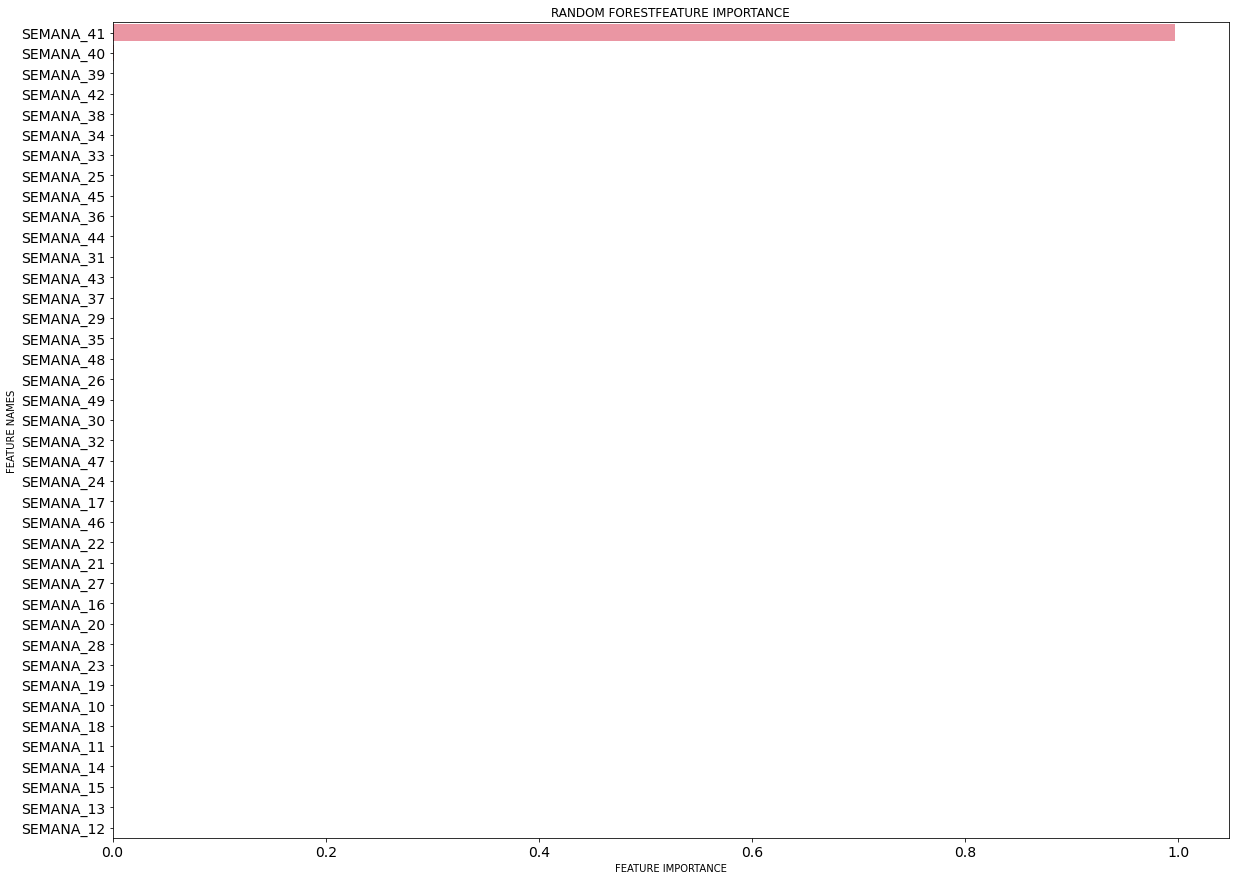

In [17]:
plot_feature_importance(rf_quant.feature_importances_,col_features_1,'RANDOM FOREST')

In [18]:
rf_quant.feature_importances_,col_features_1

(array([1.34663898e-05, 9.36324595e-06, 5.35139750e-06, 6.19717294e-06,
        8.28209663e-06, 7.25570025e-06, 1.93532872e-05, 3.05439560e-05,
        1.29372149e-05, 1.57761360e-05, 1.67582648e-05, 2.76356651e-05,
        2.78874674e-05, 1.62208990e-05, 3.14904989e-05, 8.35742545e-05,
        4.12999111e-05, 2.20337497e-05, 1.62350575e-05, 5.11147472e-05,
        3.76151286e-05, 5.70117868e-05, 3.25554586e-05, 8.77859539e-05,
        9.64039558e-05, 4.50538359e-05, 7.32355110e-05, 5.31440240e-05,
        1.36884097e-04, 2.24315129e-04, 1.06117903e-03, 9.97142533e-01,
        1.51642523e-04, 5.35357955e-05, 5.91308254e-05, 7.90459124e-05,
        2.98455129e-05, 3.19382551e-05, 4.40256870e-05, 4.03415852e-05]),
 ['SEMANA_10',
  'SEMANA_11',
  'SEMANA_12',
  'SEMANA_13',
  'SEMANA_14',
  'SEMANA_15',
  'SEMANA_16',
  'SEMANA_17',
  'SEMANA_18',
  'SEMANA_19',
  'SEMANA_20',
  'SEMANA_21',
  'SEMANA_22',
  'SEMANA_23',
  'SEMANA_24',
  'SEMANA_25',
  'SEMANA_26',
  'SEMANA_27',
  'SEMAN

## Modelo time series test 1

In [3]:
import opendatasets as od

import os, glob
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor

In [4]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')
df_test_sample = pd.read_csv('test_sample.csv', sep=',')

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

## 1. Melt the data, stack the series

In [97]:
data = pd.read_csv('train.csv')
#data = data.filter(regex=r'Product|W')
data.head()

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [98]:
data['Product_Code'] = data['Z_MODELO']+data['Z_PUNTO_VENTA']+data['Z_GAMA']
data

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,SEMANA_06,SEMANA_07,SEMANA_08,SEMANA_09,SEMANA_10,SEMANA_11,SEMANA_12,SEMANA_13,SEMANA_14,SEMANA_15,SEMANA_16,SEMANA_17,SEMANA_18,SEMANA_19,SEMANA_20,SEMANA_21,SEMANA_22,SEMANA_23,SEMANA_24,SEMANA_25,SEMANA_26,SEMANA_27,SEMANA_28,SEMANA_29,SEMANA_30,SEMANA_31,SEMANA_32,SEMANA_33,SEMANA_34,SEMANA_35,SEMANA_36,SEMANA_37,SEMANA_38,SEMANA_39,SEMANA_40,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50,Product_Code
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47168,9fc7c2306f5afb4bfe47feefbd193f245633febbb18171...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,c2890f116e4a0c94ec2c117957dca34875d5118a80aefa...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4eec71b0e096a148195feadd5e6e316dff031709400305...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c2890f116e4a0c94ec2c117957dca34875d5118a80aefa...
47169,9fc7c2306f5afb4bfe47feefbd193f245633febbb18171...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,c2890f116e4a0c94ec2c117957dca34875d5118a80aefa...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,f100265b56fc39cfd0317e03d0040f9d31514590d8f345...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c2890f116e4a0c94ec2c117957dca34875d5118a80aefa...
47170,9fc7c2306f5afb4bfe47feefbd193f245633febbb18171...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,c2890f116e4a0c94ec2c117957dca34875d5118a80aefa...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,fb0c21afb8e43d619ff3617e5bd3822e8d7ed4e0a8ecef...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c2890f116e4a0c94ec2c117957d

In [99]:
##Product code debe ser un ID unico
data['Product_Code'].value_counts().max()

1

In [100]:
data=data.drop(columns=['Z_MARCA','Z_GAMA','Z_MODELO','Z_DEPARTAMENTO','Z_PUNTO_VENTA'])

In [101]:
melt = data.melt(id_vars='Product_Code', var_name='Week', value_name='Sales')
melt.head()

,Product_Code,Week,Sales
0,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,SEMANA_01,0
1,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,SEMANA_01,0
2,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,SEMANA_01,1
3,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,SEMANA_01,0
4,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,SEMANA_01,0


In [102]:
#melt['Product_Code'] = melt['Product_Code'].str.extract('(\d+)', expand=False).astype(int)
melt['Week'] = melt['Week'].str.extract('(\d+)', expand=False).astype(int)

melt = melt.sort_values(['Week', 'Product_Code'])
melt.head()

,Product_Code,Week,Sales
12825,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12818,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12822,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12878,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,1
12817,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0


In [103]:
melt['Week'].max()

50

### SPLIT DATA

In [104]:
split_point = 40
melt_train = melt[melt['Week'] < split_point].copy()
melt_valid = melt[melt['Week'] >= split_point].copy()

In [105]:
melt_train.head()

,Product_Code,Week,Sales
12825,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12818,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12822,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0
12878,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,1
12817,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0


### Target

In [106]:
melt_train['sales_next_week'] = melt_train.groupby("Product_Code")['Sales'].shift(-1)


In [107]:
melt_train.head()

,Product_Code,Week,Sales,sales_next_week
12825,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0
12818,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0
12822,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,1.0
12878,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,1,0.0
12817,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0


In [108]:
melt_valid['sales_next_week'] = melt_valid.groupby("Product_Code")['Sales'].shift(-1)

In [109]:
melt_train.tail()

,Product_Code,Week,Sales,sales_next_week
1837743,ffa11a39a8188306f7952912725f97436e229672141654...,39,0,NaN
1837806,ffa11a39a8188306f7952912725f97436e229672141654...,39,0,NaN
1837952,ffa11a39a8188306f7952912725f97436e229672141654...,39,0,NaN
1793631,ffd32b47568352ef7db5ba896d9f367f089e3c9c3d582d...,39,0,NaN
1793608,ffd32b47568352ef7db5ba896d9f367f089e3c9c3d582d...,39,0,NaN


In [110]:
melt_train = melt_train.dropna()

In [111]:
melt_train.tail()

,Product_Code,Week,Sales,sales_next_week
1790570,ffa11a39a8188306f7952912725f97436e229672141654...,38,0,0.0
1790633,ffa11a39a8188306f7952912725f97436e229672141654...,38,0,0.0
1790779,ffa11a39a8188306f7952912725f97436e229672141654...,38,0,0.0
1746458,ffd32b47568352ef7db5ba896d9f367f089e3c9c3d582d...,38,0,0.0
1746435,ffd32b47568352ef7db5ba896d9f367f089e3c9c3d582d...,38,0,0.0


### Fundamental Features

#### Lag

In [112]:
melt_train["lag_sales_1"] = melt_train.groupby("Product_Code")['Sales'].shift(1)

In [113]:
melt_train.iloc[12825,0]

'40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9568da22baf9c6dcc7a1970f43775f2258ac2c512384323166b687aa14152129a8e2905f0b342351a5ede88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e'

In [114]:
melt_train[melt_train['Product_Code'] == "40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9568da22baf9c6dcc7a1970f43775f2258ac2c512384323166b687aa14152129a8e2905f0b342351a5ede88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e"].head()

,Product_Code,Week,Sales,sales_next_week,lag_sales_1
35640,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,1,0,0.0,NaN
82813,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,2,0,0.0,0.0
129986,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,3,0,0.0,0.0
177159,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,4,0,0.0,0.0
224332,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,5,0,0.0,0.0


In [115]:
melt_valid["lag_sales_1"] = melt_valid.groupby("Product_Code")['Sales'].shift(1)

#### Diference

In [116]:
melt_train["diff_sales_1"] = melt_train.groupby("Product_Code")['Sales'].diff(1)

In [117]:
melt_train[melt_train['Product_Code'] == "40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9568da22baf9c6dcc7a1970f43775f2258ac2c512384323166b687aa14152129a8e2905f0b342351a5ede88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e"].head()

,Product_Code,Week,Sales,sales_next_week,lag_sales_1,diff_sales_1
35640,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,1,0,0.0,NaN,NaN
82813,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,2,0,0.0,0.0,0.0
129986,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,3,0,0.0,0.0,0.0
177159,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,4,0,0.0,0.0,0.0
224332,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,5,0,0.0,0.0,0.0


In [118]:
melt_valid["diff_sales_1"] = melt_valid.groupby("Product_Code")['Sales'].diff(1)

#### Estadisticas descriptiva

In [119]:
melt_train.groupby("Product_Code")['Sales'].rolling(4).mean()

Product_Code                                                                                                                                                                                             
009e0874cc07b2180b2b2b1039321041a1f42e66693c499caf59fc74c0c45801043d83fbb5c4d83c2fb27d8e7db6ece7227740bf416e91b944092eeb8eee5932c4ebc6d4a5832cd9415f906ad03661110c705a72381c8b8b145761d02e2dd23a  12825       NaN
                                                                                                                                                                                                  59998       NaN
                                                                                                                                                                                                  107171      NaN
                                                                                                                                                                        

In [120]:
melt_train.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

12825       NaN
59998       NaN
107171      NaN
154344     0.00
201517     0.25
           ... 
1557743    0.00
1604916    0.00
1652089    0.00
1699262    0.00
1746435    0.00
Name: Sales, Length: 1792574, dtype: float64

In [121]:
melt_train["mean_sales_4"] = melt_train.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

In [122]:
melt_train[melt_train['Product_Code'] == "40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9568da22baf9c6dcc7a1970f43775f2258ac2c512384323166b687aa14152129a8e2905f0b342351a5ede88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e"].head()


,Product_Code,Week,Sales,sales_next_week,lag_sales_1,diff_sales_1,mean_sales_4
35640,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,1,0,0.0,NaN,NaN,NaN
82813,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,2,0,0.0,0.0,0.0,NaN
129986,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,3,0,0.0,0.0,0.0,NaN
177159,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,4,0,0.0,0.0,0.0,0.0
224332,40a38e760557372a93559d29bb37a6d3dc731f6dff4bc9...,5,0,0.0,0.0,0.0,0.0


In [123]:
melt_valid["mean_sales_4"] = melt_valid.groupby("Product_Code")['Sales'].rolling(4).mean().reset_index(level=0, drop=True)

#### Metricas

In [124]:
def mape(y_true, y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    #ape[~np.isfinite(ape)] = 0. # VERY questionable
    ape[~np.isfinite(ape)] = 1. # pessimist estimate
    return np.mean(ape)

def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

#### Linea Base

In [125]:
y_pred = melt_train['Sales']
y_true = melt_train['sales_next_week']

In [126]:
mape(y_true, y_pred)

0.9693358823679581

In [127]:
wmape(y_true, y_pred)

0.65553072337782

#### Entrenando el modelo

In [128]:
melt_train.head(5)

,Product_Code,Week,Sales,sales_next_week,lag_sales_1,diff_sales_1,mean_sales_4
12825,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0,NaN,NaN,NaN
12818,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0,NaN,NaN,NaN
12822,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,1.0,NaN,NaN,NaN
12878,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,1,0.0,NaN,NaN,NaN
12817,009e0874cc07b2180b2b2b1039321041a1f42e66693c49...,1,0,0.0,NaN,NaN,NaN


In [129]:
features = ['Sales', 'lag_sales_1', 'diff_sales_1', 'mean_sales_4']

In [130]:
imputer = SimpleImputer()
Xtr = imputer.fit_transform(melt_train[features])
ytr = melt_train['sales_next_week']


mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)
mdl.fit(Xtr, ytr)

RandomForestRegressor(n_jobs=6, random_state=0)

In [132]:
true_y_train=ytr.values

In [133]:
p_train = mdl.predict(Xtr)

In [136]:
p_train

array([0.12182739, 0.12182739, 0.12182739, ..., 0.0510215 , 0.0510215 ,
       0.0510215 ])

In [137]:
rmse_train = metrics.mean_squared_error(true_y_train,p_train , squared=False)
rmse_train

1.60229755950289

#### Evaluacion del modelo

In [ ]:
Xval = imputer.transform(melt_valid[features])
yval = melt_valid['sales_next_week']

p = mdl.predict(Xval)

In [ ]:
mape(yval, p)

0.9612222330805613

In [ ]:
wmape(yval, p)


0.784312937074004

#### Extencion del modelon prediccion n-rezagos

In [ ]:
melt_train['sales_next_next_week'] = melt_train.groupby("Product_Code")['Sales'].shift(-2)
melt_valid['sales_next_next_week'] = melt_valid.groupby("Product_Code")['Sales'].shift(-2)

In [ ]:
melt_train = melt_train.dropna(subset=['sales_next_week','sales_next_next_week'])

In [ ]:
imputer = SimpleImputer()
Xtr = imputer.fit_transform(melt_train[features])
ytr = melt_train[['sales_next_week', 'sales_next_next_week']]

mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)
mdl.fit(Xtr, ytr)

RandomForestRegressor(n_jobs=6, random_state=0)

In [ ]:
Xval = imputer.transform(melt_valid[features])
yval = melt_valid[['sales_next_week', 'sales_next_next_week']]

p = mdl.predict(Xval)

In [ ]:
mape(yval, p)

sales_next_week         0.961358
sales_next_next_week    0.969897
dtype: float64

In [ ]:
wmape(yval, p)

sales_next_week         0.782743
sales_next_next_week    0.900575
dtype: float64

In [ ]:
yval["sales_next_week"].values

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [ ]:
p[:,0]

array([0.12182877, 0.12182877, 0.12182877, ..., 0.05014538, 0.05014538,
       0.05014538])

In [ ]:
# %% METRICAS

rmse_t= metrics.mean_squared_error(y_train,pred_train , squared=False)
rmse_val = metrics.mean_squared_error(yval["sales_next_week"],p[:,0], squared=False)

KeyError: 0